<a href="https://colab.research.google.com/github/Hrayyan/Jamboree-Education---Linear-Regression/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: To analysis the factors which are important in graduate admissions and how these factors are interrelated among themselves. And to predict one's chances of admission given the rest of the variable and Recoganizing the most Important Variables on which the admission is dependent.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
df=pd.read_csv('/content/Jamboree_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df=df.drop(['Serial No.'],axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

Conducting Univariate Analysis


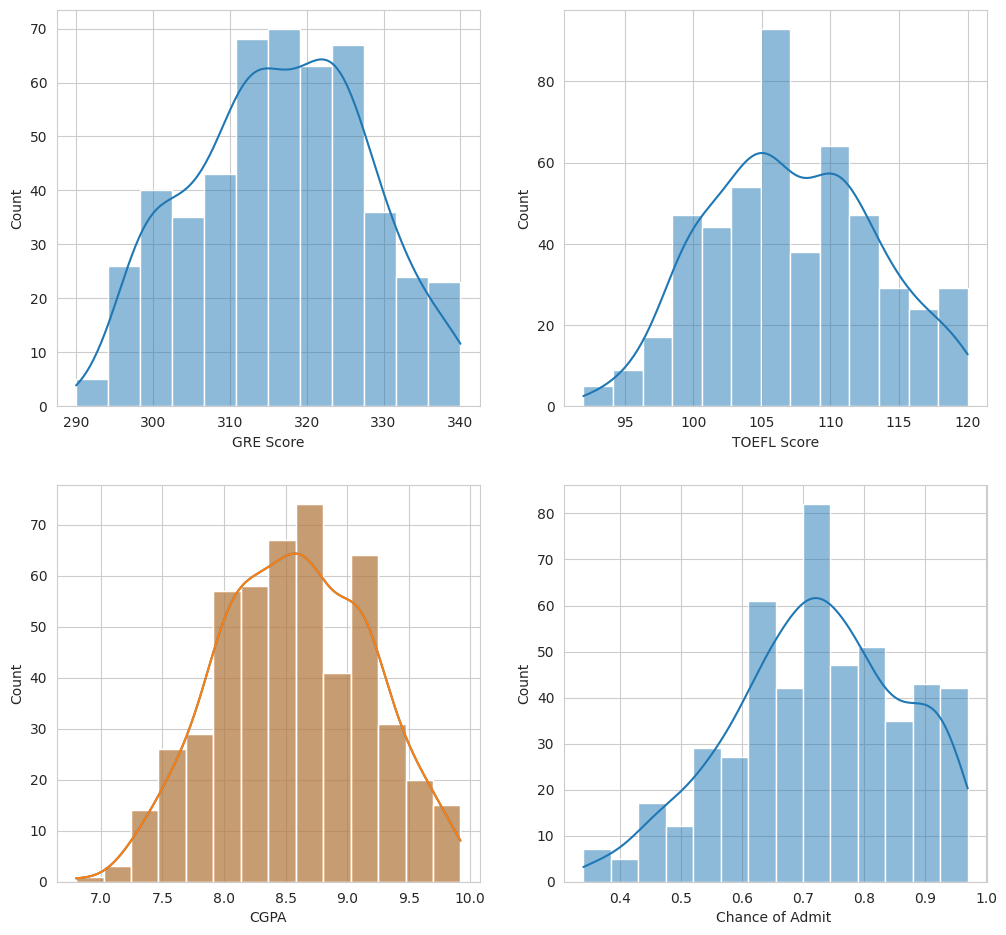

In [ ]:
#firstly lets check out How numerical variables are distributed Using Histplot
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2)
count = 0

for i in range(2):
    for j in range(2):
        if count < len(num_cols):
            sns.histplot(data=df, x=num_cols[count], kde=True, ax=axs[i, j])
            count += 1
        else:
            break

sns.histplot(data=df, x=num_cols[-1], kde=True, ax=axs[1, 0]) # we can also plot the above two columns in this format as well i.e sns.histplot(data=df,x='GRE Score',kde=True, ax=axs[0,0])
sns.histplot(data=df, x=target, kde=True, ax=axs[1, 1])       #sns.histplot(data=df,x='TOEFL Score',kde=True, ax=axs[0,1])

plt.show()


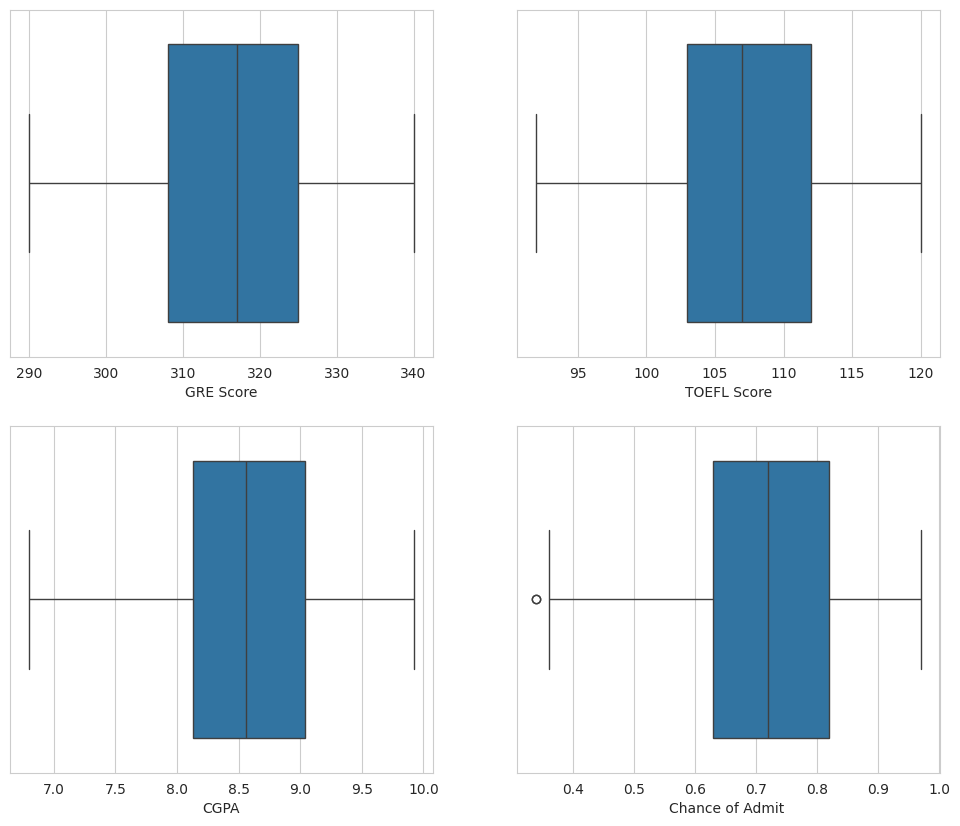

In [ ]:
#Now we will check for any outliers in the numerical columns and the Target column using boxplot
sns.set_style(style='whitegrid')
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,7))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=df,x='GRE Score',ax=axs[0,0])
sns.boxplot(data=df,x='TOEFL Score',ax=axs[0,1])
sns.boxplot(data=df,x='CGPA',ax=axs[1,0])
sns.boxplot(data=df,x=target,ax=axs[1,1])
plt.show()

There are No as such Outliers present in the dataset

In [ ]:
#lets check how many unique values are there in the categorical columns
for col in cat_cols:
    print("Column:  {:20}  Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating     Unique values: 5
Column:  SOP                   Unique values: 9
Column:  LOR                   Unique values: 9
Column:  Research              Unique values: 2


In [ ]:
# Or we can do the above task like this
df[cat_cols].nunique()

University Rating    5
SOP                  9
LOR                  9
Research             2
dtype: int64

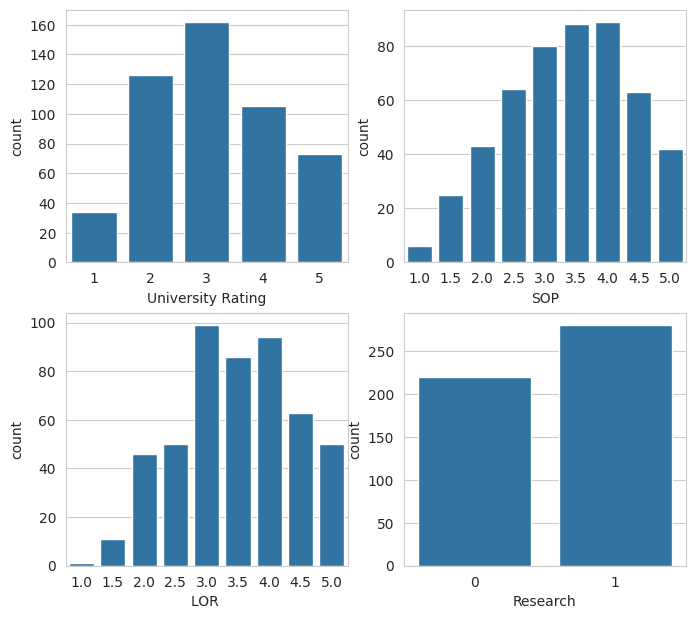

In [ ]:
#Now we will create the countplots for the categorical variables since the number of columns are not
#that much so we will not choose the iteration method for doing so

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(8,4))
fig.subplots_adjust(top=1.5)
sns.countplot(data=df, x='University Rating',ax=axs[0,0])
sns.countplot(data=df, x='SOP',ax=axs[0,1])
sns.countplot(data=df, x='LOR ',ax=axs[1,0])
sns.countplot(data=df, x='Research',ax=axs[1,1])
plt.show()

Now we will Perform BIVARIATE ANALYSIS

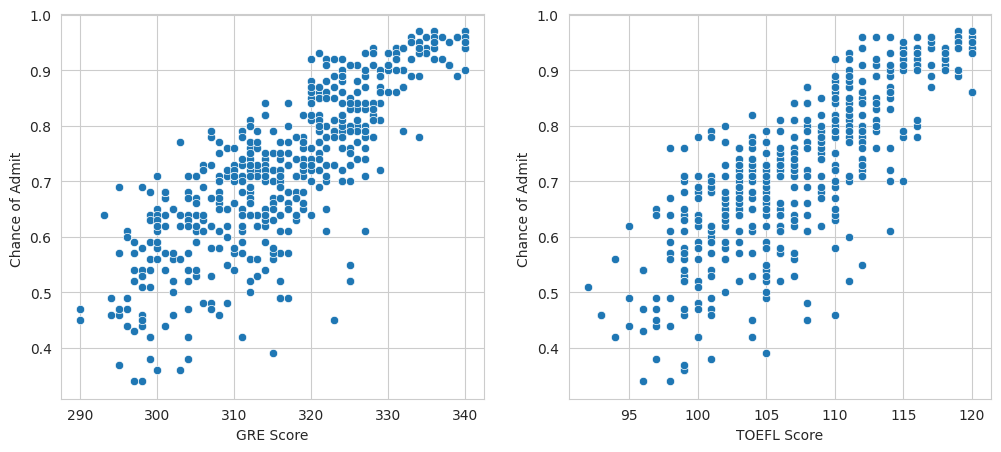

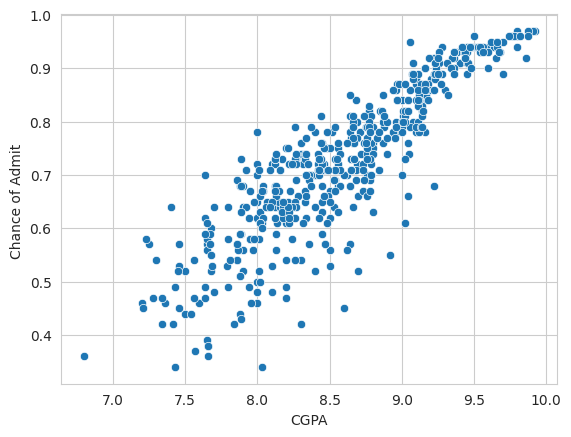

In [ ]:
#firstly we will check the relation between continous variable and target variable
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

It can be inferred that there is a linear relationship between the continuous variables and the target variable.

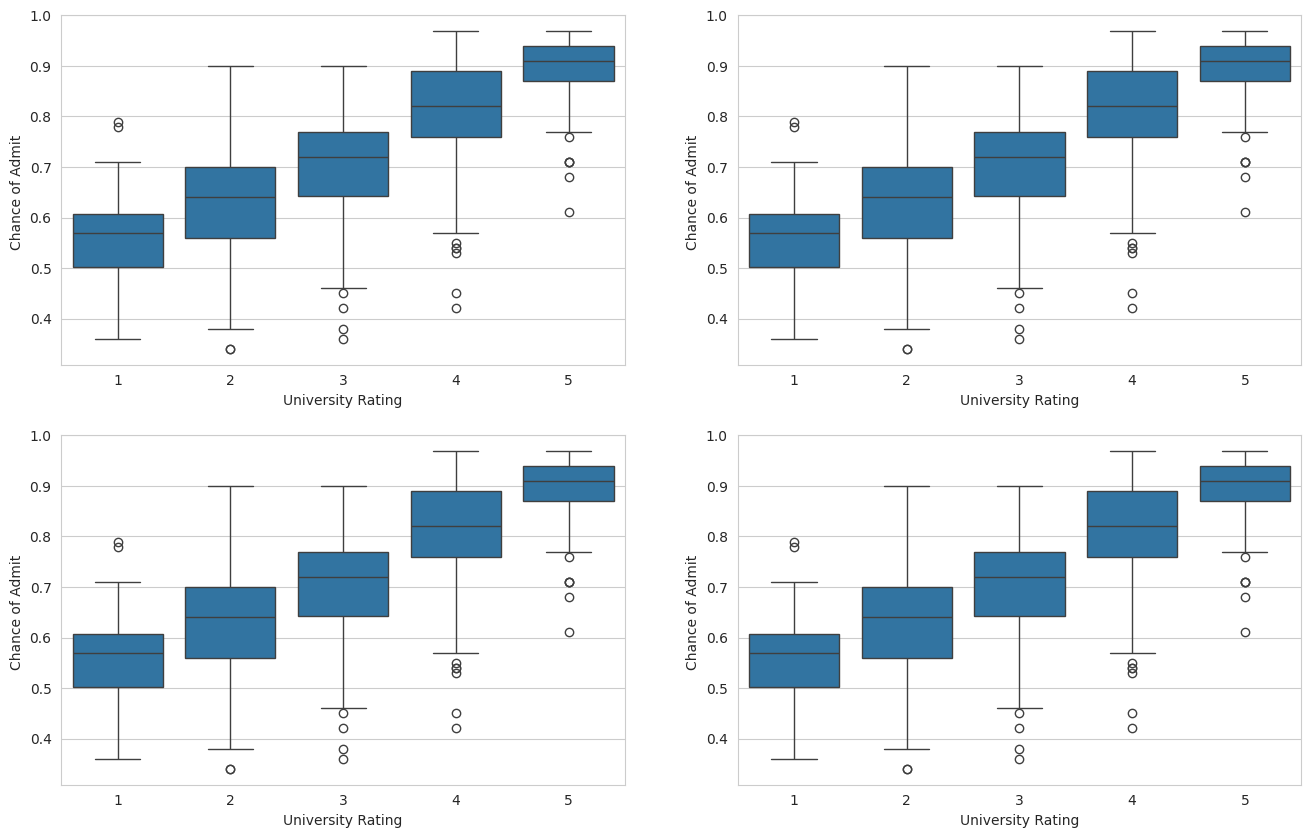

In [ ]:
# Now we will compare variation of each unique value in the catagorical columns with target variable
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[i,j])
        count += 1

=As we can see from the graphs, as the rating increases the Chance of Admit also increases.

=Students who have the research experience have more chances of Admit as compared to other students who don't have the research experience.



* Multivariate Analysis



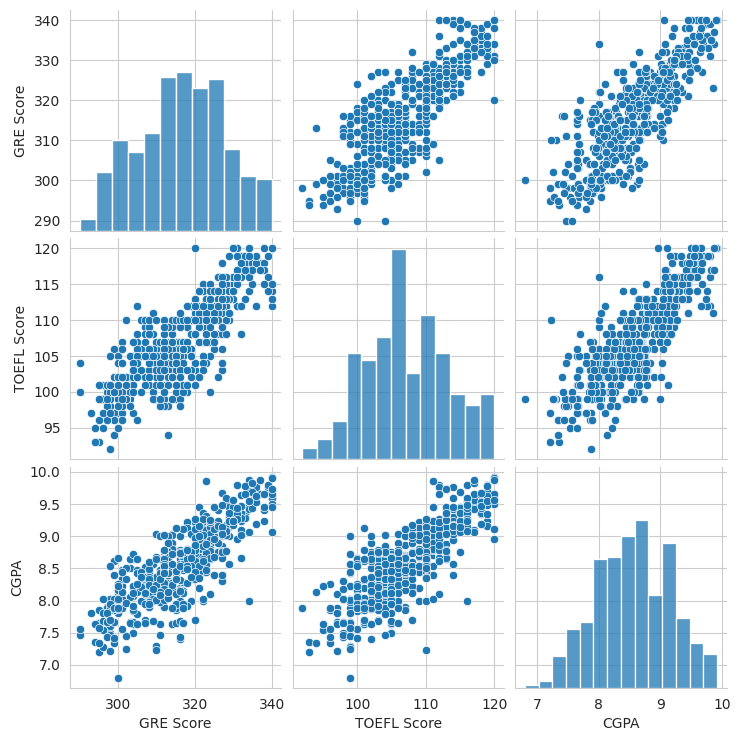

In [ ]:
sns.pairplot(df[num_cols])
plt.show()

In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

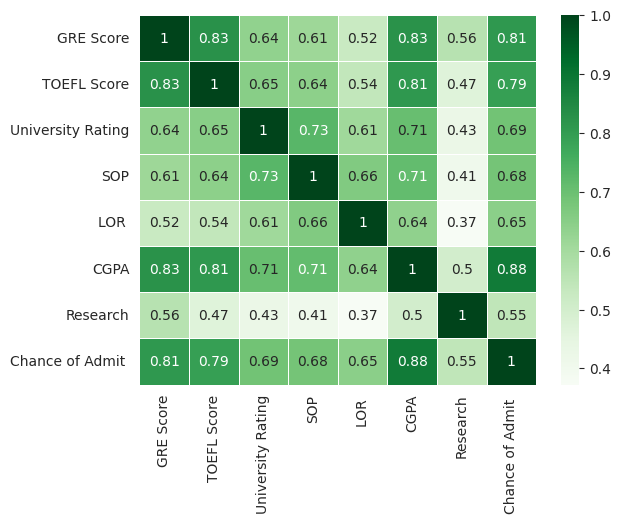

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidth=0.5)

Preprocessing the Data

In [ ]:
df.duplicated().sum()
#hence we can say There are no missing values, outliers and duplicates present in the dataset.

0



* Now we will prepare the Data for Model Building



In [ ]:
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# standardize the dataset
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)




* Now we will build the MODEL



In [ ]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)

    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res



In [ ]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [ ]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.724978121476996
              Column      Coef
0          GRE Score  0.018657
1        TOEFL Score  0.023176
2  University Rating  0.011565
3                SOP -0.000999
4               LOR   0.012497
5               CGPA  0.064671
6           Research  0.013968
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.7249823645841696
              Column      Coef
0          GRE Score  0.018902
1        TOEFL Score  0.023252
2  University Rating  0.011594
3                SOP -0.000798
4               LOR   0.012539
5               CGPA  0.064004
6           Research  0.013990
-------------

Lasso(alpha=0.001)

Since The model does not seems to be overfitting, hence Results for Linear, Ridge and Lasso are
the same.

R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.



* Now we will do the assumptions test for linear Regression model





1. Multicolinearity Check



In [ ]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [ ]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [ ]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [ ]:
# drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [ ]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [ ]:
# lets drop the LOR as well
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR '], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [ ]:
# drop the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


In [ ]:
# now again train the model with these two features only
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247774222727991
     Column      Coef
0      CGPA  0.112050
1  Research  0.020205
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247830300095277
     Column      Coef
0      CGPA  0.111630
1  Research  0.020362
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247713356661623
     Column      Coef
0      CGPA  0.111344
1  Research  0.019571
---------------------------------------

Lasso(alpha=0.001)

We can Notice that even After removing collinear features using VIF and using only two features. R2_score and Adjusted_r2 are still the same as before the testing dataset.

Mean of Residuals

It is clear from RMSE that Mean of Residuals is almost zero.

Linearity of variables

It is quite clear from EDA that independent variables are linearly dependent on the target variables.



* Check for Normality of Residuals



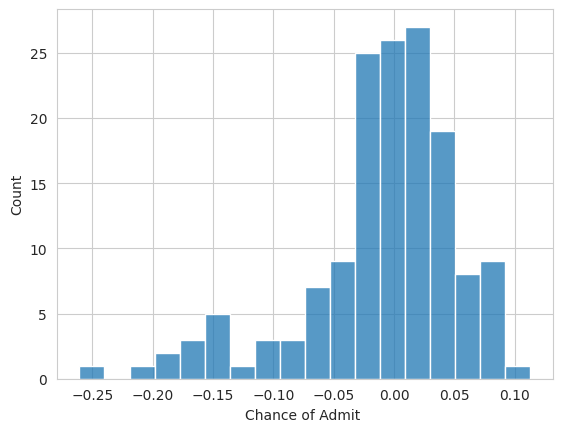

In [ ]:
#Now we will see the distribution of Residuals(the differences between the true target values y_test and the predicted target values y_pred)
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)
sns.histplot(residuals)
plt.show()

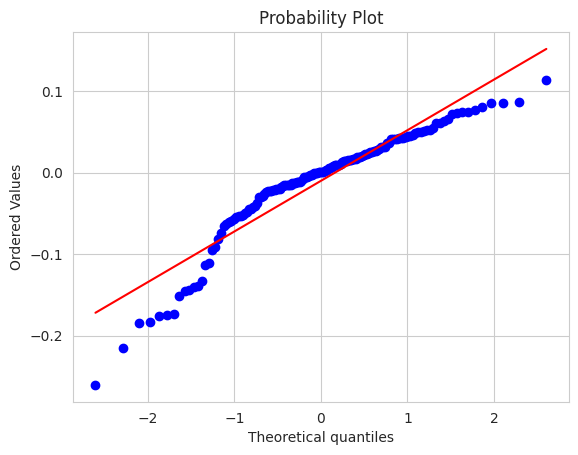

In [ ]:
stats.probplot(residuals, plot=plt)
plt.show()

#The code is generating a Q-Q (quantile-quantile) plot, also known as a probability plot, for the residuals of a regression model.
#This plot is used to assess whether the residuals follow a normal distribution.



* Check for Homoscedasticity



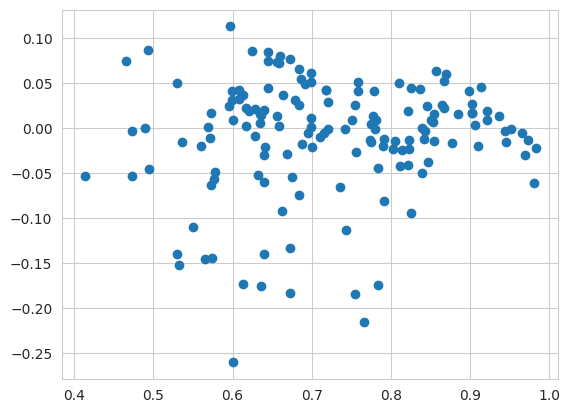

In [ ]:
plt.scatter(y_pred, residuals)
plt.show()
#By this code we will creates a scatter plot to visualize the relationship between the predicted target values (y_pred)
# and the residuals of a regression model.



* Since the plot is not creating a cone type shape. Hence there is no homoscedasticity present in the data.
* When plotting the residuals against the predicted values, if the spread of residuals remains relatively constant across the range of predicted values, it indicates homoscedasticity.





* INSIGHTS


1.   Multicollinearity is present in the data.
2.   After removing collinear features there are only two variables which are important in making predictions for the target variables

1. Indepedent variables are linearly correlated with dependent variables.

* Recommendations

1. CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.

1. CGPA is the most important varibale in making the prediction for the Chance of Admit
2.Following are the final model results on the test data:


*  RMSE: 0.07

* MAE: 0.05
*   R2_score: 0.81


*  Adjusted_R2: 0.81















